In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab as pl 


In [3]:
df = pd.read_csv('FuelConsumption.csv')
df.head(10)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [4]:
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS' ]]
cdf

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
...,...,...,...,...,...,...
1062,3.0,6,13.4,9.8,11.8,271
1063,3.2,6,13.2,9.5,11.5,264
1064,3.0,6,13.4,9.8,11.8,271
1065,3.2,6,12.9,9.3,11.3,260


In [5]:
# from sklearn.preprocessing import StandardScaler
# StandardScaler(cdf)

In [6]:
msk = np.random.randn(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]
# # train

# from sklearn.model_selection import train_test_split

# train_x , train_y, test_x, test_y = train_test_split()

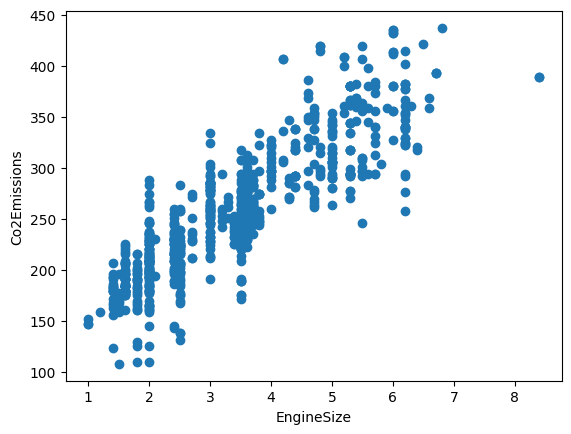

In [7]:
x1 = train['ENGINESIZE'].tolist()
y1 = train['CO2EMISSIONS'].tolist()
plt.scatter(x1, y1)
plt.xlabel('EngineSize')
plt.ylabel('Co2Emissions')
plt.show()

In [8]:
len(train['ENGINESIZE'])
len(train['CO2EMISSIONS'])

830

main program:

In [16]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print(f'Intecept : {regr.intercept_}')

Coefficients:  [[10.14843558  8.19125125  9.46542625]]
Intecept : [64.9440314]


In [17]:
x

array([[ 2.4,  4. ,  9.6],
       [ 3.5,  6. , 11.1],
       [ 3.5,  6. , 10.6],
       ...,
       [ 3.2,  6. , 11.2],
       [ 3.2,  6. , 11.3],
       [ 3.2,  6. , 12.8]])

In [19]:
model = regr.intercept_[0] + (regr.coef_[0][0]*x[:][0] + regr.coef_[0][1]*x[:][1] + regr.coef_[0][2]*x[:][2] )
# plt.plot(x, model)
# plt.scatter(x, y)
model

array([151.09864806, 211.47783875, 353.62542015])

my program:

In [11]:
from sklearn import linear_model

reg1 = linear_model.LinearRegression()
reg2 = linear_model.LinearRegression()
reg3 = linear_model.LinearRegression()

x1 = np.asanyarray(train[['ENGINESIZE']])
x2 = np.asanyarray(train[['CYLINDERS']])
x3 = np.asanyarray(train[['FUELCONSUMPTION_COMB']])
 #, 'CYLINDERS', 'FUELCONSUMPTION_COMB'
y = np.asanyarray(train[['CO2EMISSIONS']])

reg1.fit(x1, y)
reg2.fit(x2, y)
reg3.fit(x3, y)

print(f'coefficients of x1 : {reg1.coef_}')
print(f'intercept of x1: {reg1.intercept_}')

print(f'coefficients of x2 : {reg2.coef_}')
print(f'intercept of x2: {reg2.intercept_}')

print(f'coefficients of x3 : {reg3.coef_}')
print(f'intercept of x3: {reg3.intercept_}')

coefficients of x1 : [[38.97748364]]
intercept of x1: [125.71370267]
coefficients of x2 : [[29.99318485]]
intercept of x2: [82.4169319]
coefficients of x3 : [[15.9807369]]
intercept of x3: [71.1003219]


In [15]:
# intercept  === teta 0
model1 = reg1.intercept_[0] + (reg1.coef_[0][0] * x1)
model2 = reg2.intercept_[0] + (reg2.coef_[0][0] * x2)
model3 = reg3.intercept_[0] + (reg3.coef_[0][0] * x3)
plt.plot(x1,model1)
plt.plot(x2,model2)
plt.plot(x3,model3)
plt.legend(['model of EngineSize', 'model of CYLINDERS', 'FUELCONSUMPTION_COMB'])

ValueError: Data must be 1-dimensional, got ndarray of shape (830, 830) instead

In [13]:
x1 = train['ENGINESIZE']
y1 = train['CO2EMISSIONS']
print(x)
print('model :',model)
# model =reg.intercept_[0] + (reg.coef_[0][0] * train['ENGINESIZE']) + (reg.coef_[0][1] * train['CYLINDERS']) + (reg.coef_[0][2] * train['FUELCONSUMPTION_COMB'])

plt.scatter(x1, y1)
plt.plot(x, model, color='red')
plt.xlabel('EngineSize')
plt.ylabel('Co2Emissions')
plt.show()

[[ 2.4  4.   9.6]
 [ 3.5  6.  11.1]
 [ 3.5  6.  10.6]
 ...
 [ 3.2  6.  11.2]
 [ 3.2  6.  11.3]
 [ 3.2  6.  12.8]]


NameError: name 'model' is not defined